In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('weather_data_tahlia.csv')

In [84]:
df_during = df[
    (df.Data.dt.dayofyear >= 0) 
    & (df.Data.dt.dayofyear <= 200)
]

df_during.loc[:, "Year"] = df_during.Data.dt.year

df_during = df_during.dropna()
df_during_avg = df_during.groupby(df_during.Data.dt.date).mean().reset_index()
df_during_avg["Year"] = df_during_avg["Year"].map(int)
df_during_avg["Data"] = pd.to_datetime(df_during_avg["Data"])

df_during_avg_1219 = df_during_avg.set_index("Year").loc[2012:2019].reset_index()
df_during_avg_1219 = df_during_avg_1219.groupby(df_during_avg_1219.Data.dt.dayofyear).mean().reset_index()
df_during_avg_1219["Year"] = "avg12-19"

df_during_avg_20 = df_during_avg[df_during_avg.Year == 2020]
df_during_avg_20["Year"] = "20"

/var/folders/_c/fvfck0397w75sly9yb8mm1jm0000gn/T/ipykernel_14554/819224853.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_during.loc[:, "Year"] = df_during.Data.dt.year
/var/folders/_c/fvfck0397w75sly9yb8mm1jm0000gn/T/ipykernel_14554/819224853.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_during_avg_20["Year"] = "20"


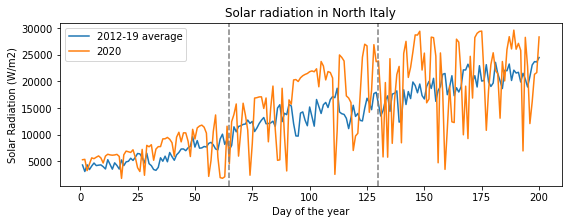

In [92]:
fig, ax = plt.subplots(figsize=(9, 3))

plt.plot(df_during_avg_1219.Data, df_during_avg_1219.sol, label="2012-19 average")
plt.plot(df_during_avg_20.Data.dt.day_of_year, df_during_avg_20.sol, label="2020")
# plt.plot(avgstations.loc[station, pol], label="2012-2019 Average")
plt.title("Solar radiation in North Italy")
plt.xlabel("Day of the year")
plt.ylabel("Solar Radiation (W/m2)")

plt.axvline(65, color="gray", linestyle="--")
plt.axvline(130, color="gray", linestyle="--")
plt.legend()
plt.show()


In [4]:
import scipy as sc
import scipy.stats

In [5]:
df["Data"] = pd.to_datetime(df["Data"], format="%Y-%m-%d %H:%M:%S")
df.dtypes

Data        datetime64[ns]
rain               float64
temp               float64
Location            object
hum                float64
w_dir              float64
w_sp               float64
press              float64
sol                float64
dtype: object